In [1]:
import numpy as np

from utils import get_logflk_config, run_toys

In [2]:
# to estimate flk_sigma from data use candidate_sigma on a reference sample 
#tune_ref_sample = np.random.default_rng(0).exponential(scale=1/8, size=(10000,1))
#candidate_sigma(tune_ref_sample)

[--] Toy 0: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2018, 1)
Iteration 0 - penalty 1.000000e-10 - sub-iterations 100


t = 10.463340091622342
Time = 3.05 sec
	


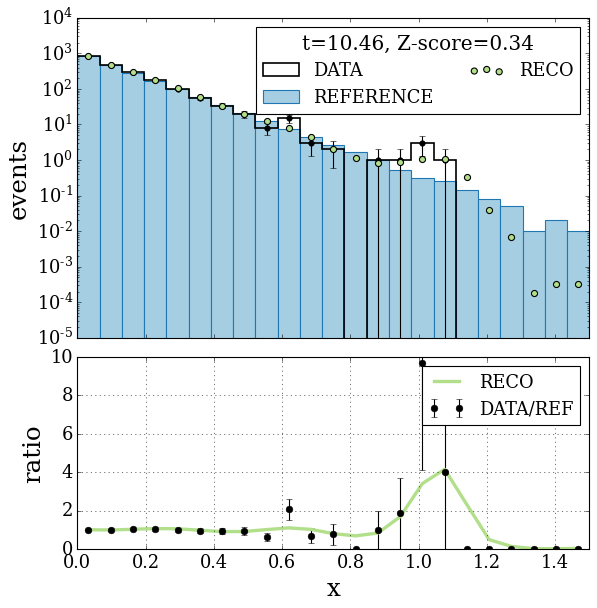

[--] Toy 1: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2001, 1)
Iteration 0 - penalty 1.000000e-10 - sub-iterations 100
t = 6.996222426272462
Time = 3.07 sec
	


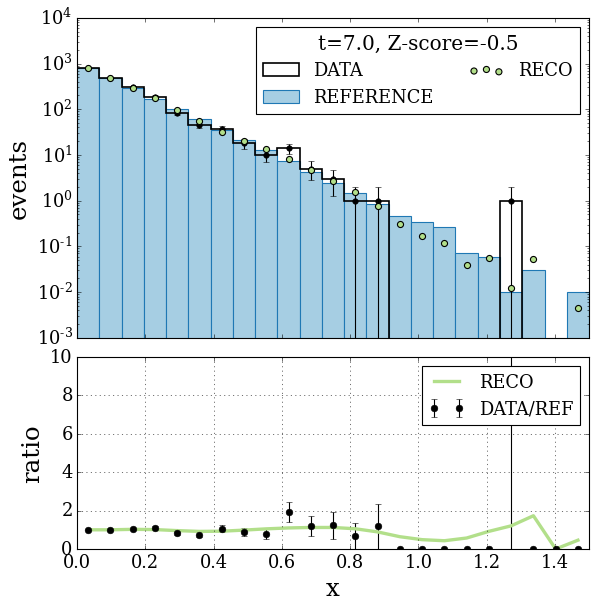

[--] Toy 0: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2020, 1)
Iteration 0 - penalty 1.000000e-10 - sub-iterations 100
t = 9.51624685765217
Time = 3.12 sec
	


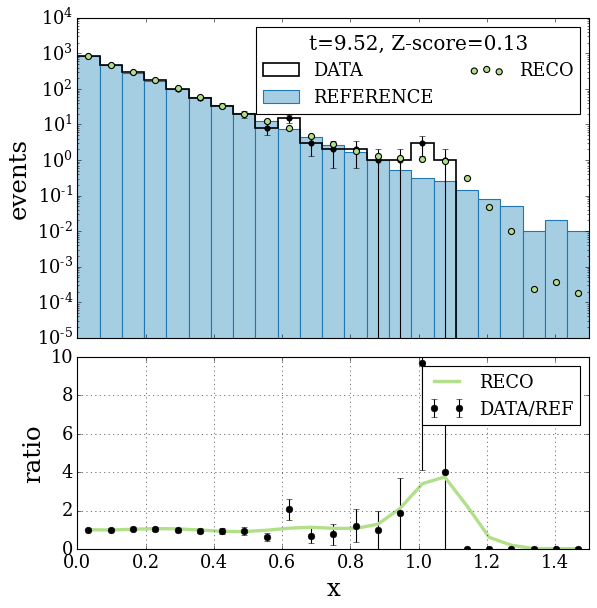

[--] Toy 1: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2009, 1)
Iteration 0 - penalty 1.000000e-10 - sub-iterations 100
t = 23.539206590551494
Time = 3.38 sec
	


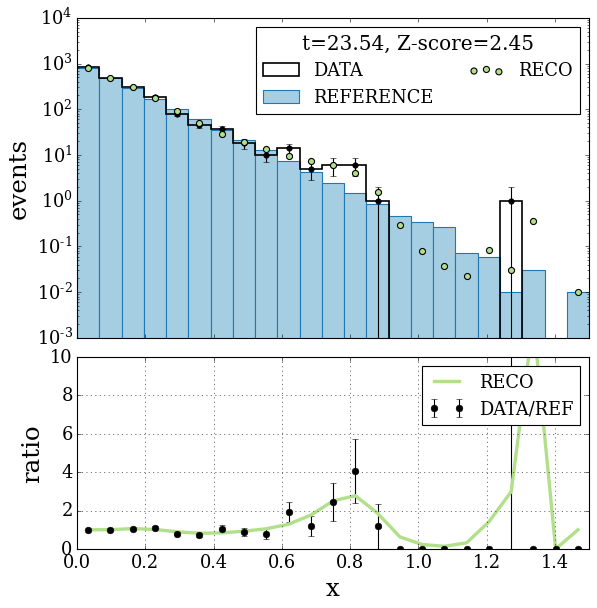

In [5]:
N_0=200000 # size of reference sample
N0=2000 # expected background
weight=N0/N_0

M=3000
lam=1e-10
flk_sigma = 0.3

flk_config = get_logflk_config(M,flk_sigma,[lam],weight=weight,iter=[100],seed=None,cpu=False) # seed is set inside learn_t function

# null hypothesis
NS=0 # expected NP component
run_toys("NP0", "./reference/", N_0, N0, NS, flk_config, toys=np.arange(2), plots_freq=1, df=9.6)

# alternative hypothesis with NP1 signal
NS=10 # expected NP component
run_toys("NP1", "./NP1/", N_0, N0, NS, flk_config, toys=np.arange(2), plots_freq=1, df=9.6)

In [ ]:
# to find the degree of freedom of the chi2 for the reference experiments, use the function return_best_chi2dof in utils.py

# in utils.py you additional functions can be found to plot the test statistics